Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



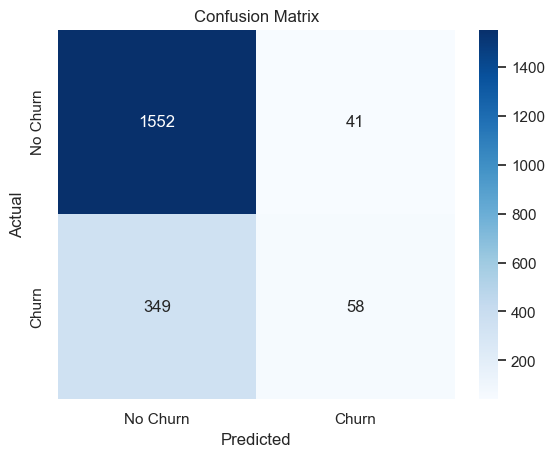

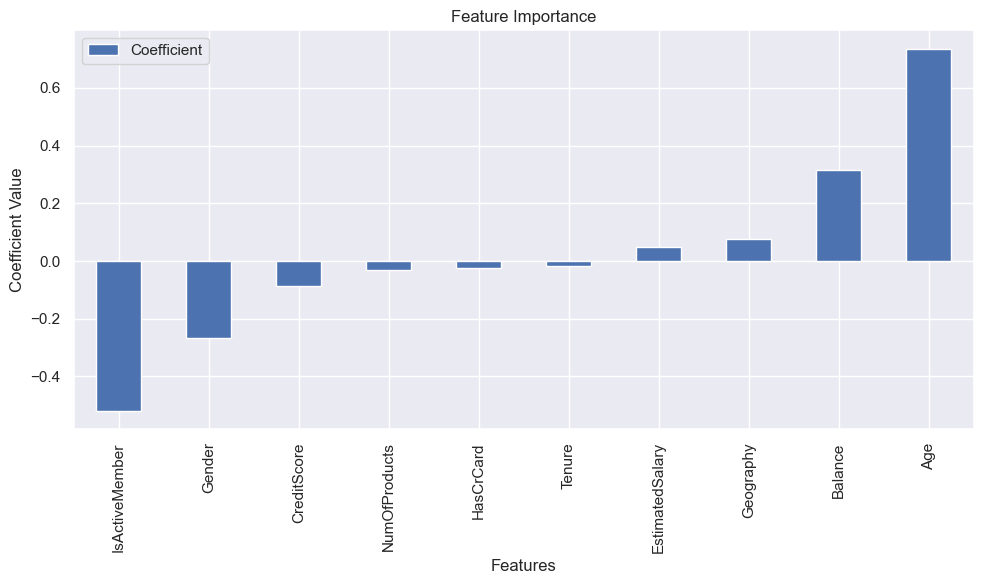

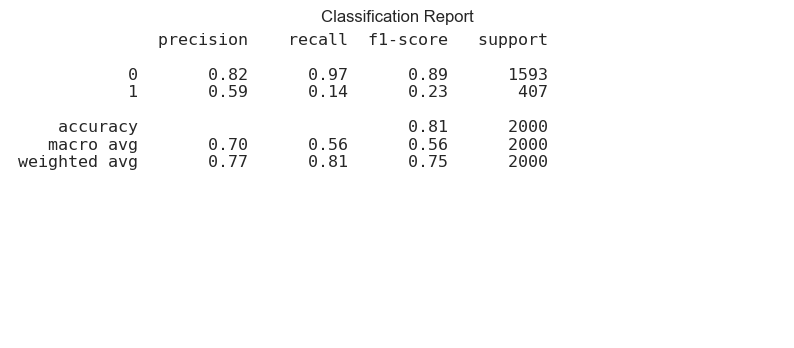

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # Ensures seaborn is properly initialized

data_path = "Churn_Modelling.csv"
data = pd.read_csv(data_path)
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
X = data.drop(columns=['Exited'])
y = data['Exited']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
joblib.dump(logistic_model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importance
coefficients = pd.DataFrame(logistic_model.coef_[0], X.columns, columns=['Coefficient']).sort_values(by='Coefficient')
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

# Plot accuracy and classification report as text
plt.figure(figsize=(10, 4))
plt.text(0.01, 0.5, str(report), {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')
plt.title('Classification Report')
plt.show()
